In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("../dataset/logistics.csv", sep=",")

df.head()

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


## Data Understanding

In [15]:
df.shape

(2000, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [17]:
df.describe()

,Weight_kg,Cost,Distance_miles,Transit_Days
count,2000.000000,1959.000000,2000.000000,2000.000000
mean,30.184800,205.161598,1275.868000,4.182500
std,124.967053,222.586082,691.382829,1.837902
min,0.000000,17.890000,101.000000,1.000000
25%,12.300000,117.710000,690.250000,3.000000
50%,20.700000,196.420000,1262.500000,4.000000
75%,33.925000,272.115000,1867.250000,5.000000
max,5404.200000,6562.210000,2499.000000,12.000000


In [18]:
df.nunique()

Shipment_ID         2000
Origin_Warehouse      10
Destination           15
Carrier                7
Shipment_Date        364
Delivery_Date        368
Weight_kg            614
Cost                1903
Status                 5
Distance_miles      1309
Transit_Days          12
dtype: int64

## Cleaning Data

### Handle missing values

In [19]:
df.isnull().sum()

Shipment_ID          0
Origin_Warehouse     0
Destination          0
Carrier              0
Shipment_Date        0
Delivery_Date       32
Weight_kg            0
Cost                41
Status               0
Distance_miles       0
Transit_Days         0
dtype: int64

In [20]:
df.dropna(inplace= True)

df.shape

(1928, 11)

### Detection outlier 

In [21]:
def detect_outliers_iqr(df):
    results = {}
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # cari outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        results[col] = {
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Jumlah Outlier": len(outliers),
            "Persentase (%)": round(len(outliers) / len(df) * 100, 2)
        }
    
    return pd.DataFrame(results).T  # transpos biar rapi

# contoh pemakaian
outlier_summary = detect_outliers_iqr(df)
print(outlier_summary)


                Lower Bound  Upper Bound  Jumlah Outlier  Persentase (%)
Weight_kg          -19.7000      65.9000           109.0            5.65
Cost              -113.3075     503.3325             4.0            0.21
Distance_miles   -1071.7500    3636.2500             0.0            0.00
Transit_Days         0.0000       8.0000            34.0            1.76


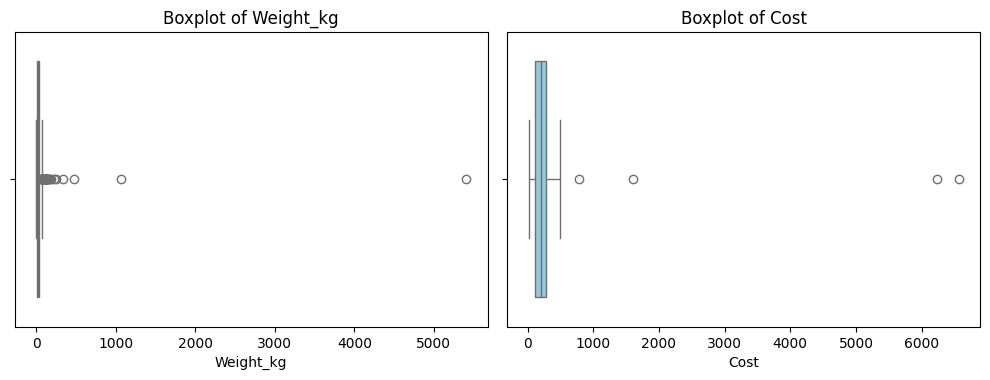

In [22]:
# Ambil kolom numerik dari DataFrame
numeric_cols = ["Weight_kg", "Cost"]

# Set ukuran canvas
plt.figure(figsize=(10, 7))

# Loop semua kolom numeric
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [24]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean


df_clean = remove_outliers_iqr(df, ["Weight_kg", "Cost"])
print("Dataset setelah hapus outlier:", df_clean.shape)


Dataset setelah hapus outlier: (1815, 11)


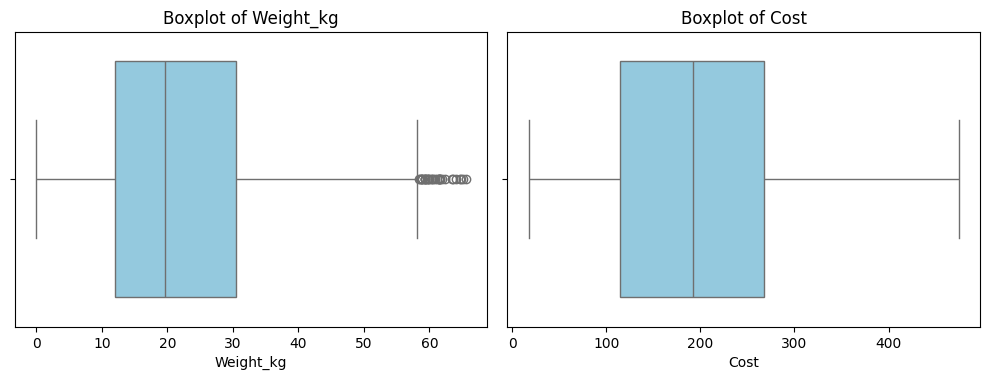

In [25]:
# Ambil kolom numerik dari DataFrame
numeric_cols = ["Weight_kg", "Cost"]

# Set ukuran canvas
plt.figure(figsize=(10, 7))

# Loop semua kolom numeric
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.boxplot(x=df_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### Check Transit_days consistency

In [26]:
df_clean['Delivery_Date'] = pd.to_datetime(df_clean['Delivery_Date'])
df_clean['Shipment_Date'] = pd.to_datetime(df_clean['Shipment_Date'])

In [27]:
selisih_hari = (df_clean['Delivery_Date']-df_clean['Shipment_Date']).dt.days

df_clean['Selisih_hari'] = selisih_hari

In [28]:
jumlah_sama = (df_clean['Transit_Days'] == df_clean['Selisih_hari']).sum()
jumlah_tidak_sama = (df_clean['Transit_Days'] != df_clean['Selisih_hari']).sum()
total = len(df_clean)

print(f"Jumlah yang SAMA: {jumlah_sama} ({jumlah_sama/total*100:.2f}%)")
print(f"Jumlah yang TIDAK SAMA: {jumlah_tidak_sama} ({jumlah_tidak_sama/total*100:.2f}%)")
print(f"Total data: {total}")

Jumlah yang SAMA: 1622 (89.37%)
Jumlah yang TIDAK SAMA: 193 (10.63%)
Total data: 1815


In [29]:
# # menampilkan baris yang tidak sama
# index_tidak_sama = df[df['Transit_Days'] != df['Selisih_hari']].index.tolist()

# print(f"Baris yang TIDAK SAMA (index):")
# print(index_tidak_sama)

In [30]:
# # cek perbedaan Transit_days dengan Selisih_hari
# df[['Delivery_Date','Shipment_Date','Selisih_hari','Transit_Days']].iloc[11]

In [31]:
df_clean['Error_Type'] = np.where(df_clean['Selisih_hari'] < 0, 'Negative_Days',
                   np.where(abs(df_clean['Transit_Days'] - df_clean['Selisih_hari']) > 1,'Major_Mismatch',
                   np.where(df_clean['Transit_Days'] != df_clean['Selisih_hari'], 'Minor_Mismatch', 'OK')))


In [32]:
df_clean['Error_Type'].value_counts()

Error_Type
OK                1622
Major_Mismatch     160
Minor_Mismatch      18
Negative_Days       15
Name: count, dtype: int64

In [33]:
# Hapus baris dengan error fatal: Negative_Days dan Major_Mismatch
df_clean = df_clean[~df_clean['Error_Type'].isin(['Negative_Days', 'Major_Mismatch'])].copy()

print("Ukuran data setelah cleaning :", len(df_clean))


Ukuran data setelah cleaning : 1640


## Exploratory Data Understanding (EDA)

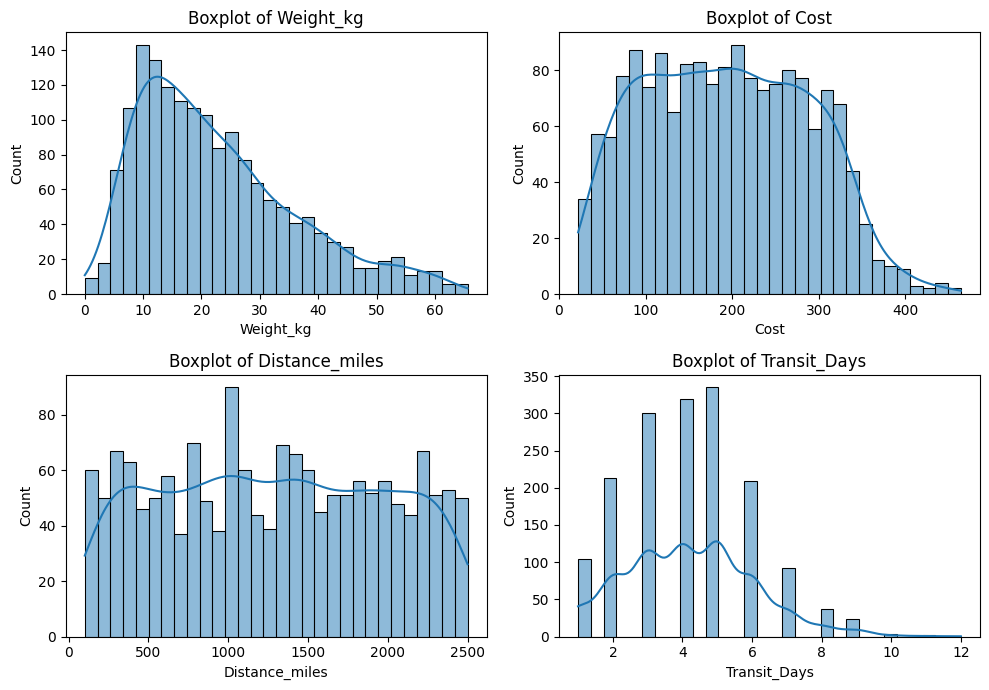

In [34]:
# Ambil kolom numerik dari DataFrame
numeric_cols = ['Weight_kg', 'Cost', 'Distance_miles', 'Transit_Days']

# Set ukuran canvas
plt.figure(figsize=(10, 7))

# Loop semua kolom numeric
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

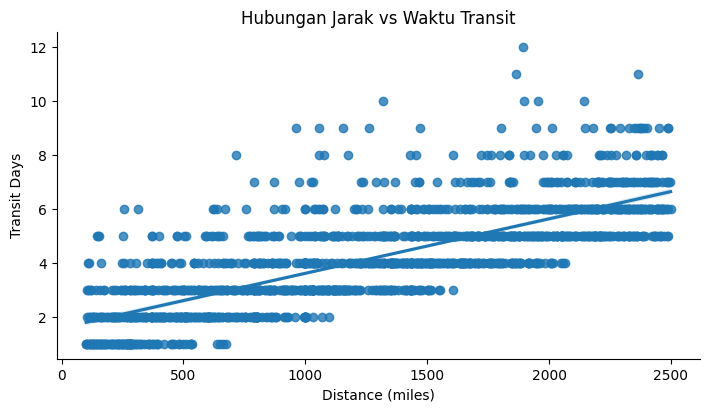

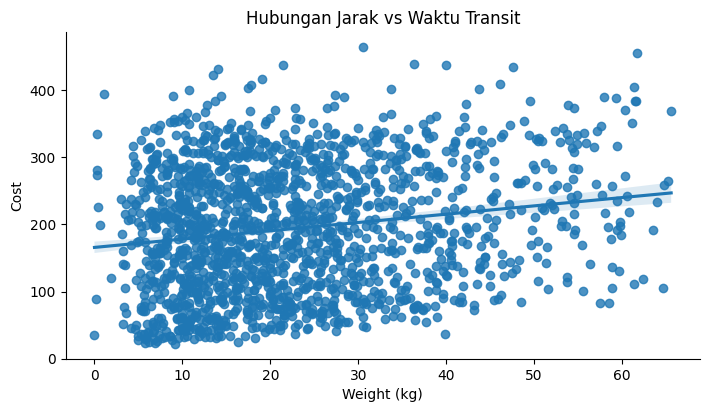

In [35]:
sns.lmplot(x="Distance_miles", y="Transit_Days", data=df_clean, height=4, aspect=1.8)
plt.xlabel('Distance (miles)')
plt.ylabel('Transit Days')
plt.title('Hubungan Jarak vs Waktu Transit')
plt.show()

sns.lmplot(x="Weight_kg", y="Cost", data=df_clean, height=4, aspect=1.8)
plt.xlabel('Weight (kg)')
plt.ylabel('Cost')
plt.title('Hubungan Jarak vs Waktu Transit')
plt.show()


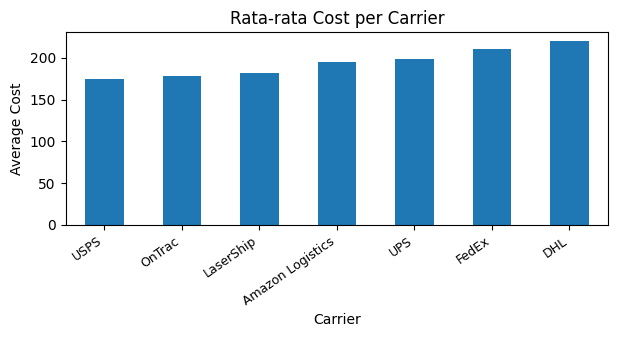

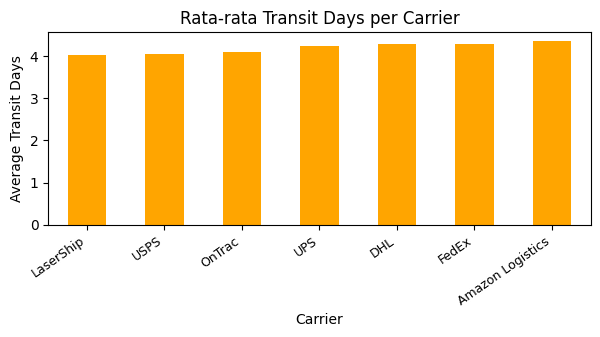

In [36]:
# Rata-rata Cost per Carrier
avg_cost_carrier = df_clean.groupby('Carrier')['Cost'].mean().sort_values()
avg_cost_carrier.plot(kind='bar', figsize=(7,2.5), title="Rata-rata Cost per Carrier")
plt.xticks(rotation=35, ha='right', fontsize=9)
plt.ylabel("Average Cost")
plt.show()

# Rata-rata Transit_Days per Carrier
avg_transit_region = df_clean.groupby('Carrier')['Transit_Days'].mean().sort_values()
avg_transit_region.plot(kind='bar', figsize=(7,2.5), title="Rata-rata Transit Days per Carrier", color="orange")
plt.xticks(rotation=35, ha='right', fontsize=9)
plt.ylabel("Average Transit Days")
plt.show()



## Save to csv

In [37]:
# df_final = df_clean.drop(columns=["Selisih_hari", "Error_Type"], errors="ignore")

In [ ]:
# # Simpan ke file baru
# df_final.to_csv("../Logistics_ML/dataset/logistics_clean.csv", index=False)
